ARIMA(0, 0, 0) MAE=2402178.115 RMSE=3774520.361 BIAS=-2402178.115
ARIMA(0, 0, 1) MAE=1392132.543 RMSE=2080459.838 BIAS=-1266373.374
ARIMA(0, 0, 2) MAE=985482.063 RMSE=1527915.890 BIAS=-848473.810
ARIMA(0, 0, 3) MAE=666935.249 RMSE=1083718.058 BIAS=-563350.963
ARIMA(0, 0, 4) MAE=598587.763 RMSE=961693.237 BIAS=-445412.210
ARIMA(0, 1, 0) MAE=414823.042 RMSE=695771.003 BIAS=-15704.566
ARIMA(0, 1, 1) MAE=403175.309 RMSE=674411.057 BIAS=-12548.188
ARIMA(0, 1, 2) MAE=392146.946 RMSE=657739.311 BIAS=-10389.714
ARIMA(0, 1, 3) MAE=393050.543 RMSE=660331.410 BIAS=-8538.602
ARIMA(0, 1, 4) MAE=395294.819 RMSE=663363.934 BIAS=-7809.011
ARIMA(0, 2, 0) MAE=471907.202 RMSE=818706.504 BIAS=-1369.336
ARIMA(0, 2, 1) MAE=406843.921 RMSE=665767.225 BIAS=-4752.094
ARIMA(0, 2, 2) MAE=418464.057 RMSE=681297.491 BIAS=-6358.957
ARIMA(0, 2, 3) MAE=392186.758 RMSE=658363.675 BIAS=-7161.913
ARIMA(0, 2, 4) MAE=393077.603 RMSE=660958.717 BIAS=-5409.254
ARIMA(0, 3, 0) MAE=793080.549 RMSE=1410478.217 BIAS=1604.689
ARI

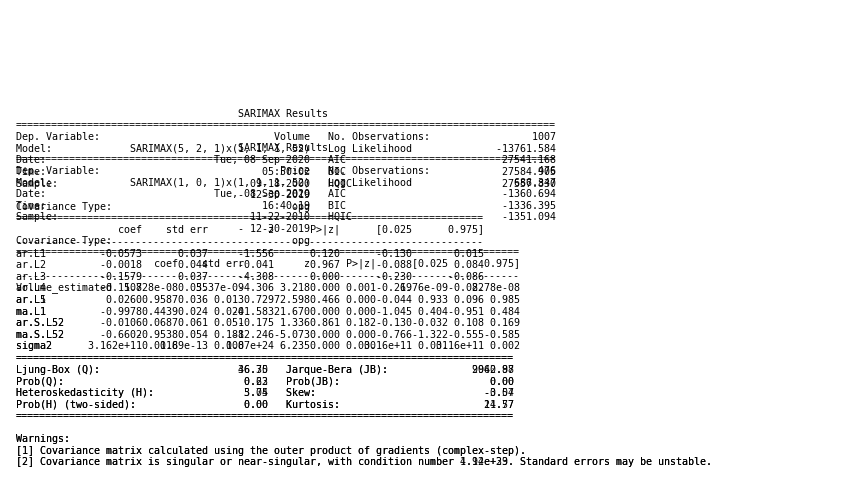

In [1]:
crop_list = [['STRAWBERRIES','US','MX','med','SARIMAX','','','USD','KG',None]]

for i in range(0, len(crop_list)):

    crop = crop_list[i]
    import sys
    sys.path.insert(0, '../../src')
    #   https://realpython.com/python-modules-packages/
    sys.path.append('../../src/d01_data')
    sys.path.append('../../src/d02_processing')
    sys.path.append('../../src/d03_modelling')

    import extractions as extract
    import transformations as transf
    import training as train
    import import_data as imp
    import inference as inf
    import time  
    from dateutil.relativedelta import relativedelta
    from datetime import date


    ####################  Train ARIMA volume  ####################

    # Training

    startp = time.time()

    crop = crop_list[i][0]
    ctry = crop_list[i][1]
    trade_ctry = crop_list[i][2]
    ctgr = crop_list[i][3]
    mdel = crop_list[i][4]
    regn = crop_list[i][5]
    pkge = crop_list[i][6]
    crcy = crop_list[i][7]
    msre = crop_list[i][8]
    exog = crop_list[i][9]
    start = date.today().strftime('%Y-01-01')
    end = (date.today() + relativedelta(years=1)).strftime('%Y-12-31')
    
    ################################### Train SARIMA volumes  ##################################  
    train.train_sarima_model_vols(crop,ctry,trade_ctry,ctgr)

    #################### Inference volumes ####################
    mdel_vols = 'SARIMA'
    df_pred_vols = inf.get_prediction_vols(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel_vols,start,end)
    # not necessary to save volumes predicted in DB
    exog = df_pred_vols[df_pred_vols.Date_ref > date.today().strftime('%Y-01-01')].drop(columns=['Volume']).set_index('Date_ref')

    #################################### Train SARIMAX model  ###################################
    train.train_sarimax_model(crop,ctry,trade_ctry,ctgr,exog)

    #################### Inference SARIMAX price (including SARIMA volumes)  ####################
    df_pred = inf.get_prediction(ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel,exog,start,end)
    inf.load_predictions_db(df_pred,ctry,crop,trade_ctry,regn,ctgr,pkge,crcy,msre,mdel)

    endp = time.time()
    duration = endp - startp
    minutes = duration // 60
    seconds = duration - (minutes * 60)
    print(f"{minutes} minutes and {seconds} seconds")